<a href="https://colab.research.google.com/github/raihanrama/Repo-Data-Cleaning-Python/blob/main/data_analis_kaggle_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.IMPORT DATASET**

## 1.1 **Download semua kebutuhan**

In [ ]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

## **1.2 Import Dataset**

In [3]:
# ===========================
# IMPORT LIBRARY
# ===========================
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew, kurtosis

sns.set()
%matplotlib inline

In [4]:
# ===========================
# LOAD DATASET
# ===========================
file_path = "/content/population_data.csv"
df = pd.read_csv(file_path, encoding='latin-1')

print("=== Data Loaded ===")
print(f"Jumlah Baris : {df.shape[0]}")
print(f"Jumlah Kolom : {df.shape[1]}")
print("="*40)

=== Data Loaded ===
Jumlah Baris : 233
Jumlah Kolom : 12


In [5]:
# Ringkasan Awal Dataset
print("\n=== Ringkasan Awal Dataset ===")
print(f"Tipe Data: {type(df)}")
print(f"Ukuran Dataset: {df.size} elemen")
print(f"Apakah ada missing values?: {df.isnull().any().any()}")


=== Ringkasan Awal Dataset ===
Tipe Data: <class 'pandas.core.frame.DataFrame'>
Ukuran Dataset: 2796 elemen
Apakah ada missing values?: True


# **2.EDA**

## **2.1 Melihat Struktur Dataset**

In [6]:
# ===========================
# MELIHAT 5 BARIS DATA PERTAMA
# ===========================
print("\n=== 5 Data Teratas ===")
display(df.head())


=== 5 Data Teratas ===


,id,Country (or dependency),Population 2025,Yearly Change,Net Change,Density (P/KmÂ²),Land Area (KmÂ²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
0,1,India,1463865525,0.89%,12929734,492,2973190,"â495,753",1.94,28.8,37.1%,17.78%
1,2,China,1416096094,â0.23%,"â3,225,184",151,9388211,"â268,126",1.02,40.1,67.5%,17.20%
2,3,United States,347275807,0.54%,1849236,38,9147420,1230663,1.62,38.5,82.8%,4.22%
3,4,Indonesia,285721236,0.79%,2233305,158,1811570,"â39,509",2.10,30.4,59.6%,3.47%
4,5,Pakistan,255219554,1.57%,3950390,331,770880,"â1,235,336",3.50,20.6,34.4%,3.10%


In [7]:
# ===========================
# MELIHAT INFORMASI MENGENAI DATASET YANG DIGUNAKAN
# ===========================
print("\n=== Info Dataset ===")
df.info()


=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       233 non-null    int64  
 1   Country (or dependency)  233 non-null    object 
 2   Population 2025          233 non-null    int64  
 3   Yearly Change            233 non-null    object 
 4   Net Change               233 non-null    object 
 5   Density (P/KmÂ²)         233 non-null    int64  
 6   Land Area (KmÂ²)         233 non-null    int64  
 7   Migrants (net)           233 non-null    object 
 8   Fert. Rate               233 non-null    float64
 9   Median Age               233 non-null    float64
 10  Urban Pop %              210 non-null    object 
 11  World Share              233 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 22.0+ KB


In [8]:
print("\n=== Statistik Deskriptif (Numerik) ===")
display(df.describe())


=== Statistik Deskriptif (Numerik) ===


,id,Population 2025,Density (P/KmÂ²),Land Area (KmÂ²),Fert. Rate,Median Age
count,233.000000,2.330000e+02,233.000000,2.330000e+02,233.000000,233.000000
mean,117.000000,3.532080e+07,487.673820,5.583427e+05,2.306094,31.896996
std,67.405489,1.391905e+08,2412.937646,1.694270e+06,1.134316,9.860936
min,1.000000,5.010000e+02,0.000000,0.000000e+00,0.690000,14.500000
25%,59.000000,4.663300e+05,38.000000,2.830000e+03,1.470000,22.900000
50%,117.000000,5.731206e+06,98.000000,8.220000e+04,1.940000,32.800000
75%,175.000000,2.407458e+07,256.000000,4.103400e+05,2.950000,39.800000
max,233.000000,1.463866e+09,25732.000000,1.637687e+07,5.940000,57.400000


In [9]:
print("\n=== Statistik Deskriptif (Objek) ===")
display(df.describe(include="object"))


=== Statistik Deskriptif (Objek) ===


,Country (or dependency),Yearly Change,Net Change,Migrants (net),Urban Pop %,World Share
count,233,233,233,233,210,233
unique,233,177,231,233,191,165
top,India,2.43%,156,"â495,753",67.5%,0.13%
freq,1,4,2,1,2,8


In [10]:
# Tampilkan nama kolom dalam bentuk tabel
df_columns = pd.DataFrame(df.columns.tolist(), columns=['Nama Kolom'])
print("\n=== Nama Kolom (Tabel) ===")
display(df_columns)


=== Nama Kolom (Tabel) ===


,Nama Kolom
0,id
1,Country (or dependency)
2,Population 2025
3,Yearly Change
4,Net Change
5,Density (P/KmÂ²)
6,Land Area (KmÂ²)
7,Migrants (net)
8,Fert. Rate
9,Median Age


In [11]:
print("\n=== Jumlah Nilai Unik Tiap Kolom ===")
print(df.nunique())


=== Jumlah Nilai Unik Tiap Kolom ===
id                         233
Country (or dependency)    233
Population 2025            233
Yearly Change              177
Net Change                 231
Density (P/KmÂ²)           164
Land Area (KmÂ²)           224
Migrants (net)             233
Fert. Rate                 159
Median Age                 173
Urban Pop %                191
World Share                165
dtype: int64


## **2.2 Melihat Missing Value, Duplikat, dan Nilai Null**

In [12]:
# ===========================
# CEK JUMLAH NILAI DATA NULL PADA DATASET
# ===========================
print("\n=== Missing Values ===")
missing_values = df.isnull().sum()
print(missing_values)


=== Missing Values ===
id                          0
Country (or dependency)     0
Population 2025             0
Yearly Change               0
Net Change                  0
Density (P/KmÂ²)            0
Land Area (KmÂ²)            0
Migrants (net)              0
Fert. Rate                  0
Median Age                  0
Urban Pop %                23
World Share                 0
dtype: int64


In [13]:
# ===========================
# CEK PRESENTASE NILAI DATA NULL PADA DATASET
# ===========================
print("\n=== Persentase Nilai Null Values ===")
percent_missing = (missing_values / len(df)) * 100
print(percent_missing)


=== Persentase Nilai Null Values ===
id                         0.000000
Country (or dependency)    0.000000
Population 2025            0.000000
Yearly Change              0.000000
Net Change                 0.000000
Density (P/KmÂ²)           0.000000
Land Area (KmÂ²)           0.000000
Migrants (net)             0.000000
Fert. Rate                 0.000000
Median Age                 0.000000
Urban Pop %                9.871245
World Share                0.000000
dtype: float64


In [14]:
# ===========================
# CEK DUPLIKAT PADA DATASET
# ===========================

print("\n=== Jumlah Data Duplikat ===")
print(df.duplicated().sum())

# Tampilkan baris yang terduplikat
print("\n=== Baris Data Duplikat ===")
display(df[df.duplicated(keep=False)]) # keep=False untuk menampilkan semua duplikat


=== Jumlah Data Duplikat ===
0

=== Baris Data Duplikat ===


,id,Country (or dependency),Population 2025,Yearly Change,Net Change,Density (P/KmÂ²),Land Area (KmÂ²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share



=== Visualisasi Outlier (Sebelum Pembersihan) ===


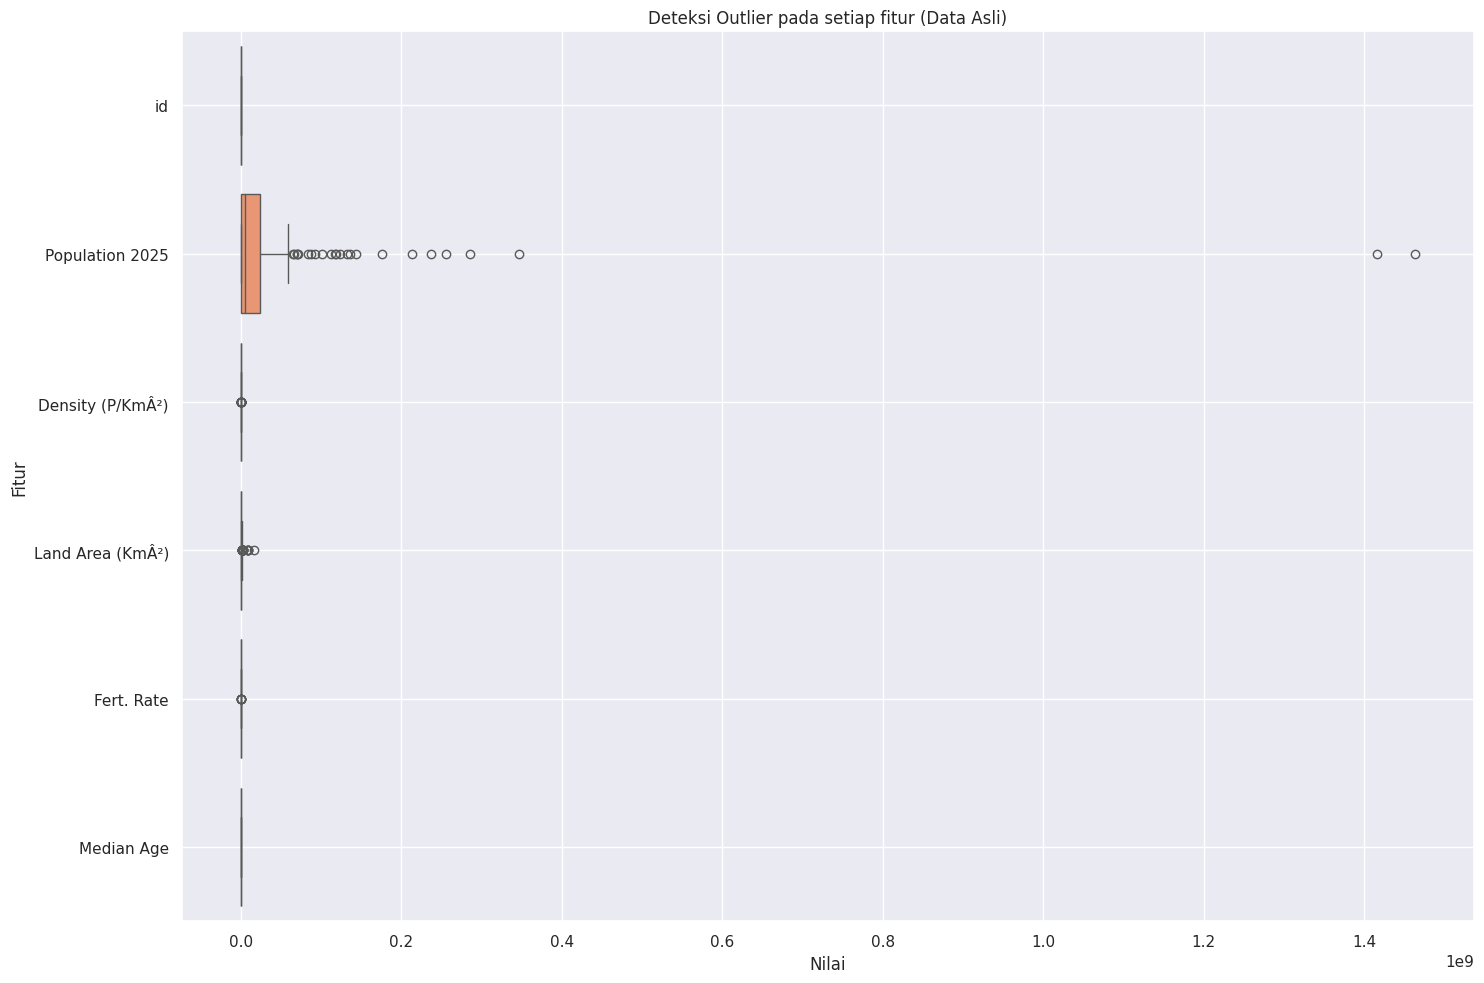

In [15]:
# ===========================
# OUTLIER
# ===========================

# Visualisasi Outlier (menggunakan data asli untuk deteksi awal)
print("\n=== Visualisasi Outlier (Sebelum Pembersihan) ===")

# Ambil semua kolom numerik dari df
numerik_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Buat figure besar agar semua boxplot muat
plt.figure(figsize=(15, 10))

# Plot semua boxplot secara horizontal
sns.boxplot(data=df[numerik_cols], orient="h", palette="Set2")

plt.title("Deteksi Outlier pada setiap fitur (Data Asli)")
plt.xlabel("Nilai")
plt.ylabel("Fitur")
plt.grid(True)
plt.tight_layout()
plt.show()

# **3. DATA PREPOCESSING**

In [16]:
# ===========================
# PEMISAHAN TIPE DATA
# ===========================
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
obj_cols = df.select_dtypes(include=['object']).columns

print("\nKolom Numerik :", num_cols.tolist())
print("Kolom Object  :", obj_cols.tolist())


Kolom Numerik : ['id', 'Population 2025', 'Density (P/KmÂ²)', 'Land Area (KmÂ²)', 'Fert. Rate', 'Median Age']
Kolom Object  : ['Country (or dependency)', 'Yearly Change', 'Net Change', 'Migrants (net)', 'Urban Pop %', 'World Share']


In [17]:
# Distribusi Frekuensi Kolom Kategorikal (tabel DataFrame)
print("\n=== Distribusi Frekuensi Kolom Kategorikal ===")

for col in obj_cols:
    freq_df = (
       df[col]
       .value_counts(dropna=False)
        .reset_index()
    )
    freq_df.columns = [col, 'Count']
    freq_df['Percentage'] = (freq_df['Count'] / len(df) * 100).round(2)

    display(freq_df)  # Akan menampilkan tabel rapi di Jupyter / Notebook



=== Distribusi Frekuensi Kolom Kategorikal ===


,Country (or dependency),Count,Percentage
0,India,1,0.43
1,China,1,0.43
2,United States,1,0.43
3,Indonesia,1,0.43
4,Pakistan,1,0.43
...,...,...,...
228,Montserrat,1,0.43
229,Falkland Islands,1,0.43
230,Tokelau,1,0.43
231,Niue,1,0.43


,Yearly Change,Count,Percentage
0,2.43%,4,1.72
1,0.47%,4,1.72
2,0.65%,4,1.72
3,0.92%,3,1.29
4,0.59%,3,1.29
...,...,...,...
172,â0.74%,1,0.43
173,â1.6%,1,0.43
174,â0.96%,1,0.43
175,â0.68%,1,0.43


,Net Change,Count,Percentage
0,156,2,0.86
1,5,2,0.86
2,12929734,1,0.43
3,2233305,1,0.43
4,3950390,1,0.43
...,...,...,...
226,â40,1,0.43
227,â30,1,0.43
228,â1,1,0.43
229,102,1,0.43


,Migrants (net),Count,Percentage
0,"â495,753",1,0.43
1,"â268,126",1,0.43
2,1230663,1,0.43
3,"â39,509",1,0.43
4,"â1,235,336",1,0.43
...,...,...,...
228,â9,1,0.43
229,â17,1,0.43
230,53,1,0.43
231,3,1,0.43


,Urban Pop %,Count,Percentage
0,NaN,23,9.87
1,67.5%,2,0.86
2,41.4%,2,0.86
3,91.4%,2,0.86
4,72%,2,0.86
...,...,...,...
187,43.4%,1,0.43
188,65.6%,1,0.43
189,94.2%,1,0.43
190,33.4%,1,0.43


,World Share,Count,Percentage
0,0.13%,8,3.43
1,0.14%,5,2.15
2,0.12%,4,1.72
3,0.11%,4,1.72
4,0.034%,4,1.72
...,...,...,...
160,0.000053%,1,0.43
161,0.000042%,1,0.43
162,0.000032%,1,0.43
163,0.000022%,1,0.43


In [18]:
# Skewness & Kurtosis
print("\n=== Skewness & Kurtosis (Numerik) ===")
for col in num_cols:
    skew_val = skew(df[col], nan_policy='omit')
    kurt_val = kurtosis(df[col], nan_policy='omit')
    print(f"{col} -> Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}")


=== Skewness & Kurtosis (Numerik) ===
id -> Skewness: 0.00, Kurtosis: -1.20
Population 2025 -> Skewness: 9.01, Kurtosis: 87.18
Density (P/KmÂ²) -> Skewness: 9.23, Kurtosis: 89.09
Land Area (KmÂ²) -> Skewness: 6.02, Kurtosis: 42.10
Fert. Rate -> Skewness: 1.15, Kurtosis: 0.78
Median Age -> Skewness: 0.02, Kurtosis: -1.08


In [19]:
# ===========================
# IMPUTASI MISSING VALUES
# ===========================
df_clean = df.copy()

# Imputasi "Tidak Diketahui" untuk kolom object yang ditentukan
cols_to_fill_unknown = [] # Postal_Code is numerical, so it's removed from here
for col in cols_to_fill_unknown:
    if col in obj_cols and df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna("0", inplace=True)

# Imputasi 0 for Postal_Code (numerical)
if 'Postal_Code' in num_cols and df_clean['Postal_Code'].isnull().sum() > 0:
    df_clean['Postal_Code'].fillna(0, inplace=True)


# # Imputasi median untuk numerik (untuk kolom numerik lainnya)
# for col in num_cols:
#     if col not in cols_to_fill_unknown + ['Kode_RS'] and df_clean[col].isnull().sum() > 0:
#             df_clean[col].fillna(df_clean[col].median(), inplace=True)

# # Imputasi modus untuk object (untuk kolom object lainnya)
# for col in obj_cols:
#     if col not in cols_to_fill_unknown and df_clean[col].isnull().sum() > 0:
#             df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


print("\n=== Missing Values Setelah Imputasi ===")
print(df_clean.isnull().sum())

# Simpan hasil imputasi
df_clean.to_csv("dataset_after_imputation.csv", index=False)


=== Missing Values Setelah Imputasi ===
id                          0
Country (or dependency)     0
Population 2025             0
Yearly Change               0
Net Change                  0
Density (P/KmÂ²)            0
Land Area (KmÂ²)            0
Migrants (net)              0
Fert. Rate                  0
Median Age                  0
Urban Pop %                23
World Share                 0
dtype: int64


In [20]:
# ===========================
# CEK KEMBALI MISSING VALUE
# ===========================
# Missing values terbanyak
print("\n=== Missing Values (Urut Terbanyak) ===")
missing_percent = (df_clean.isnull().sum() / len(df)) * 100
missing_sorted = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_sorted)


=== Missing Values (Urut Terbanyak) ===
Urban Pop %    9.871245
dtype: float64


In [21]:
# ===========================
# HAPUS DUPLIKAT
# ===========================
df_outlier_cleaned = df_clean.copy()
print(f"\nJumlah duplikat: {df_outlier_cleaned.duplicated().sum()}")
df_outlier_cleaned.drop_duplicates(inplace=True)
print(f"Jumlah baris setelah hapus duplikat: {df_outlier_cleaned.shape[0]}")


Jumlah duplikat: 0
Jumlah baris setelah hapus duplikat: 233


In [ ]:
# ===========================
# PENANGANAN OUTLIER DENGAN METODE IQR
# ===========================

# Kolom yang akan ditangani outlier-nya
outlier_cols = [' '] #Tidak ada indikasi outlier

# Buat salinan DataFrame untuk penanganan outlier
df_outlier_cleaned = df_clean.copy()

for col in outlier_cols:
    Q1 = df_outlier_cleaned[col].quantile(0.25)
    Q3 = df_outlier_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data untuk menghilangkan outlier
    df_outlier_cleaned = df_outlier_cleaned[
        (df_outlier_cleaned[col] >= lower_bound) &
        (df_outlier_cleaned[col] <= upper_bound)
    ]

    print(f"Jumlah baris setelah menghilangkan outlier di kolom {col}: {df_outlier_cleaned.shape[0]}")

print("\n=== Outlier Removal Selesai ===")


KeyError: 'Sales'

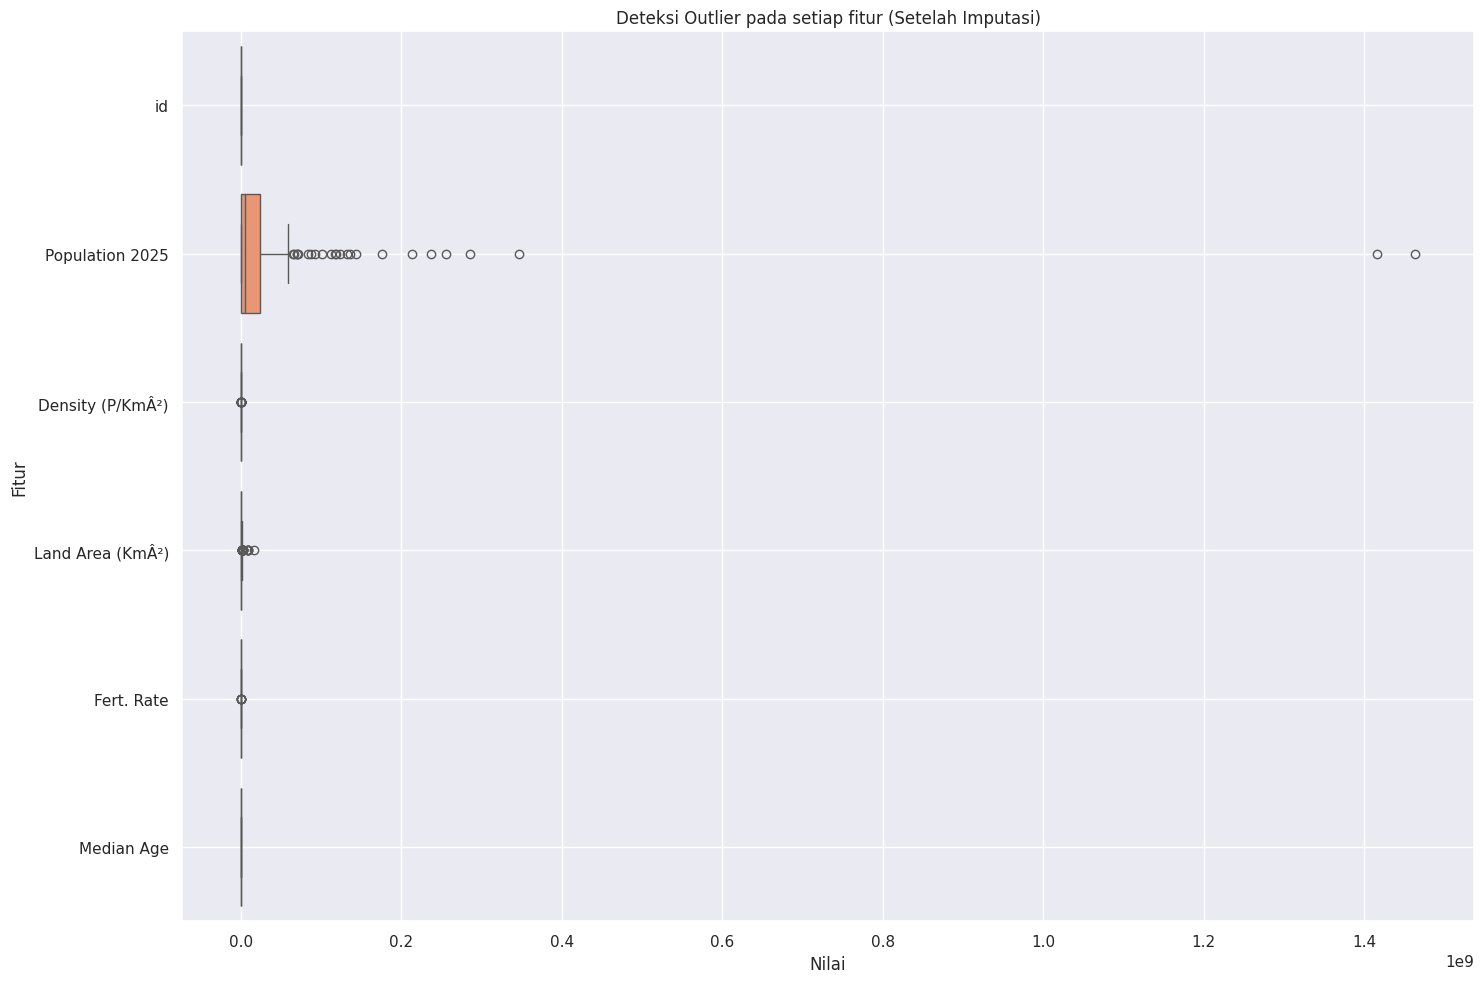

In [22]:
# ===========================
# VISUALISASI OUTLIER
# ===========================

# Ambil kolom numerik yang diinginkan dari df_clean (kecuali Kode_RS)
numerik_cols_clean = ['id', 'Population 2025', 'Density (P/KmÂ²)', 'Land Area (KmÂ²)', 'Fert. Rate', 'Median Age']

# Buat figure besar agar semua boxplot muat
plt.figure(figsize=(15, 10))

# Plot semua boxplot secara horizontal (orientasi agar lebih mudah dibaca)
sns.boxplot(data=df_outlier_cleaned[numerik_cols_clean], orient="h", palette="Set2")

plt.title("Deteksi Outlier pada setiap fitur (Setelah Imputasi)")
plt.xlabel("Nilai")
plt.ylabel("Fitur")
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# ===========================
# DESKRIPSI DATA SETELAH PENANGANAN OUTLIER
# ===========================
print("\n=== Statistik Deskriptif Setelah Penanganan Outlier ===")
display(df_outlier_cleaned.describe())


=== Statistik Deskriptif Setelah Penanganan Outlier ===


,id,Population 2025,Density (P/KmÂ²),Land Area (KmÂ²),Fert. Rate,Median Age
count,233.000000,2.330000e+02,233.000000,2.330000e+02,233.000000,233.000000
mean,117.000000,3.532080e+07,487.673820,5.583427e+05,2.306094,31.896996
std,67.405489,1.391905e+08,2412.937646,1.694270e+06,1.134316,9.860936
min,1.000000,5.010000e+02,0.000000,0.000000e+00,0.690000,14.500000
25%,59.000000,4.663300e+05,38.000000,2.830000e+03,1.470000,22.900000
50%,117.000000,5.731206e+06,98.000000,8.220000e+04,1.940000,32.800000
75%,175.000000,2.407458e+07,256.000000,4.103400e+05,2.950000,39.800000
max,233.000000,1.463866e+09,25732.000000,1.637687e+07,5.940000,57.400000


In [24]:
# Simpan hasil outlier removal
df_outlier_cleaned.to_csv("dataset_after_outlier.csv", index=False)

# **4.VISUALISASI KORELASI**

## Melihat Korelasi Antar Fitur Numerik


=== Matriks Korelasi Fitur Numerik ===


,id,Population 2025,Density (P/KmÂ²),Land Area (KmÂ²),Fert. Rate,Median Age
id,1.000000,-0.363873,0.124572,-0.392536,-0.235805,0.273054
Population 2025,-0.363873,1.000000,-0.025402,0.448457,-0.032182,-0.013868
Density (P/KmÂ²),0.124572,-0.025402,1.000000,-0.058213,-0.125565,0.181592
Land Area (KmÂ²),-0.392536,0.448457,-0.058213,1.000000,-0.019433,0.017698
Fert. Rate,-0.235805,-0.032182,-0.125565,-0.019433,1.000000,-0.854768
Median Age,0.273054,-0.013868,0.181592,0.017698,-0.854768,1.000000


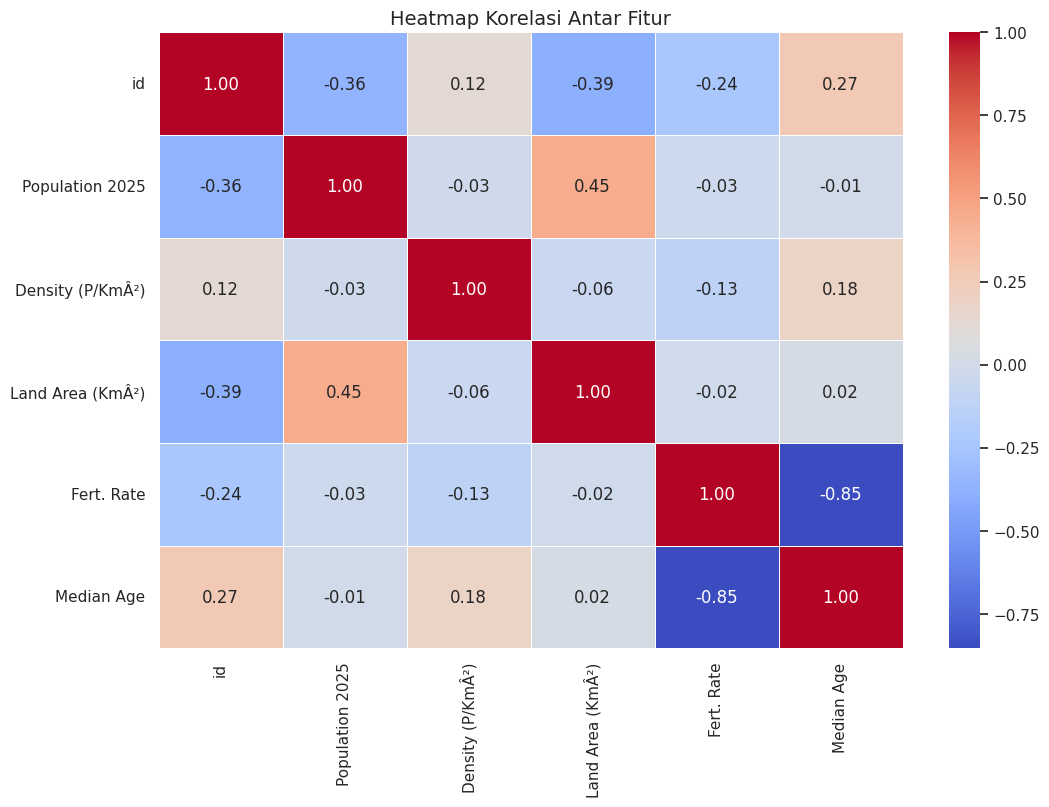

In [25]:
# Korelasi
correlation_matrix = df_outlier_cleaned[num_cols].corr()
print("\n=== Matriks Korelasi Fitur Numerik ===")
display(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur", fontsize=14)
plt.show()

## Pair Pot


=== Pairplot Antar Fitur Numerik ===


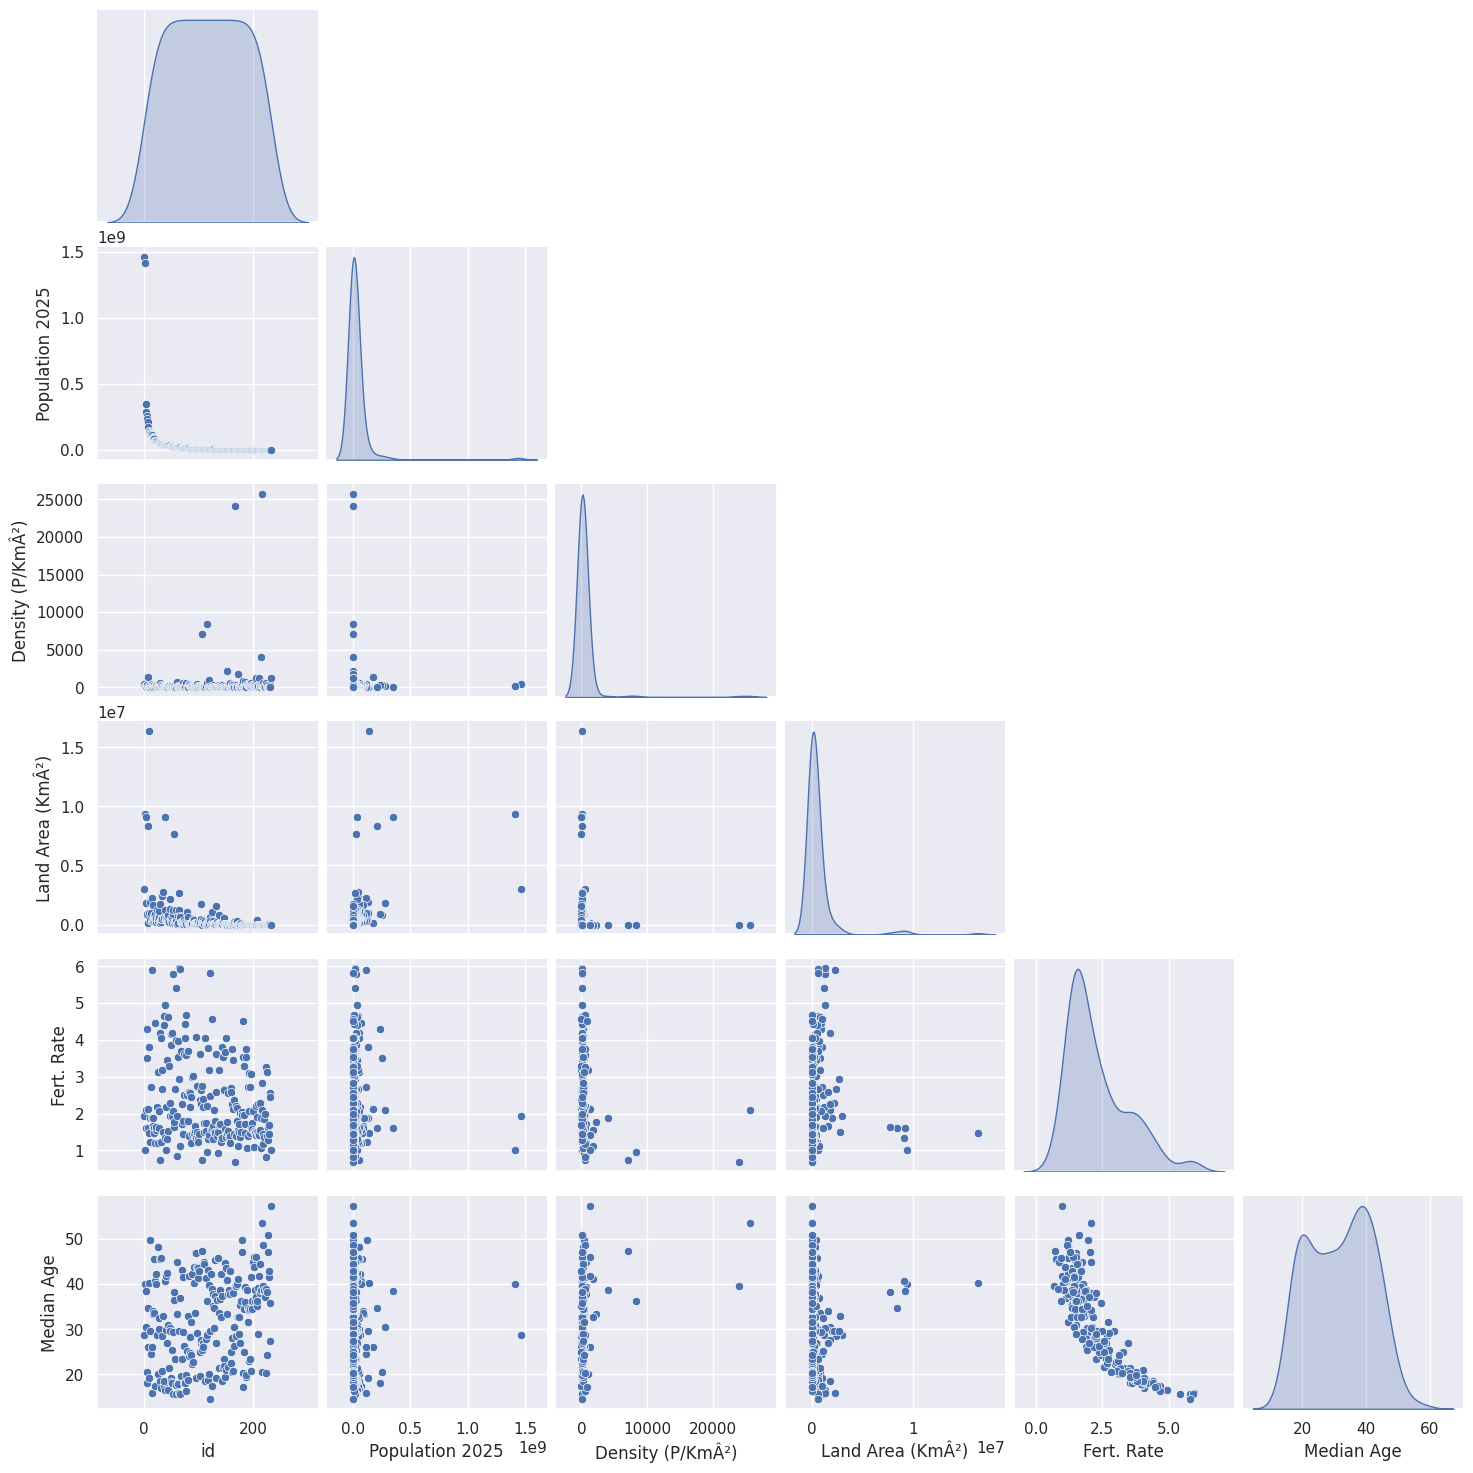

In [26]:
# Pairplot
print("\n=== Pairplot Antar Fitur Numerik ===")
sns.pairplot(df_outlier_cleaned[num_cols], diag_kind='kde', corner=True)
plt.show()


=== Distribusi Fitur Utama ===


ValueError: num must be an integer with 1 <= num <= 4, not 5

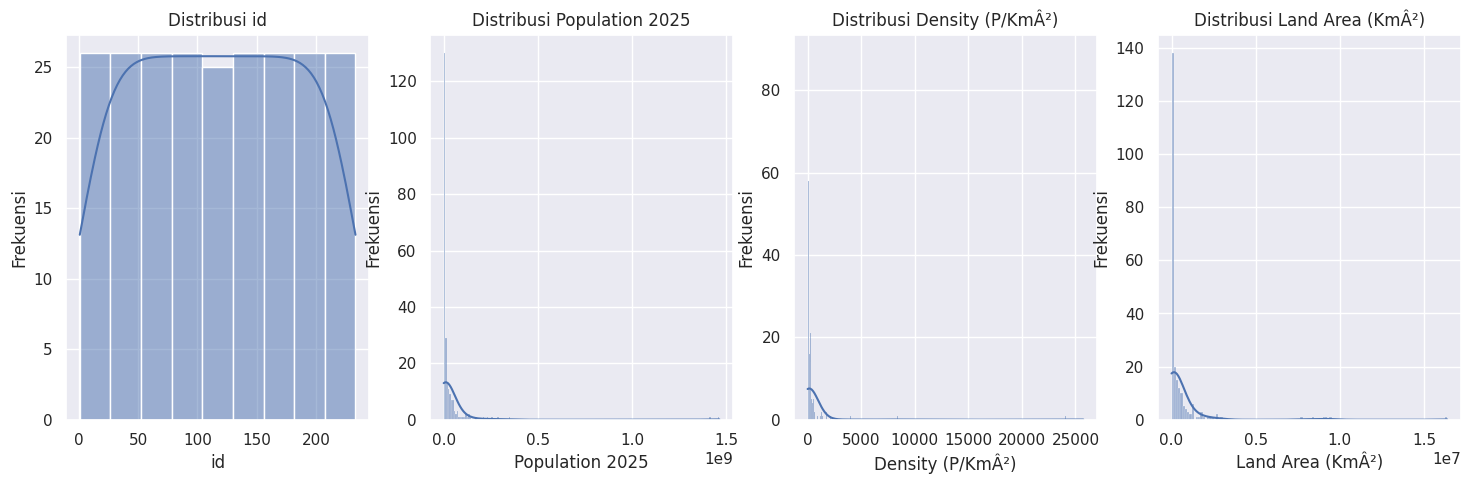

In [28]:
# ===========================
# EKSPLORASI FITUR UTAMA
# ===========================

# Visualisasi distribusi fitur numerik utama
main_numeric_features = ['id', 'Population 2025', 'Density (P/KmÂ²)', 'Land Area (KmÂ²)', 'Fert. Rate', 'Median Age']

print("\n=== Distribusi Fitur Utama ===")

plt.figure(figsize=(18, 5))
for i, col in enumerate(main_numeric_features):
    plt.subplot(1, 4, i + 1)
    sns.histplot(data=df_outlier_cleaned, x=col, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# Anda juga bisa mengeksplorasi hubungan fitur utama dengan kolom kategorikal,
# contoh: Total_Tempat_Tidur berdasarkan Jenis_RS atau Kelas_RS.
# Berikut contoh untuk Jenis_RS:

print("\n=== Money Distribution Based on Time of Day ===")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_outlier_cleaned, x='Time_of_Day', y='money')
plt.xticks(rotation=0) # No rotation needed for few categories
plt.title('Money Distribution Based on Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Money')
plt.tight_layout()
plt.show()